<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/DASHBOARD_UPDATE_WATER_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UPDATE AGOL WATER DASHBOARD SCRIPTS**
## Cloned from: WATER-SAMP-SETUP-2021
6-28-2021
Copying most update agol Class Library

## IMPORT DEPENDENCIES
**Updated 6-15-2021**



In [1]:
# geoPandas libraries
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install pygeos 
!pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gpd

# ArcGIS Pytho API libraries 
!pip install arcgis
from arcgis.gis import GIS, Item
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer

import datetime as dt
import getpass
import pandas as pd
import time

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-oroqky7t
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-oroqky7t
  Created wheel for geopandas: filename=geopandas-0.9.0+37.gae3f821-py2.py3-none-any.whl size=996489 sha256=5a9b2383019bca3d4808b1226c64bf7fd51c988d80a811882a4583d088f56730
  Stored in directory: /tmp/pip-ephem-wheel-cache-njawyj27/wheels/91/24/71/376c9c67192694168352

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


  Using cached https://files.pythonhosted.org/packages/c5/8f/51e89ce52a085483359217bc72cdbf6e75ee595d5b1d4b5ade40c7e018b8/jsonschema-3.2.0-py2.py3-none-any.whl
ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
ERROR: jupyter-server 1.9.0 has requirement jupyter-client>=6.1.1, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


## agol CLASS DEFINITION

In [127]:
# Create new class from ArcGIS Python API functions
class agol:
  # -init- function, get user credentials to access GIS object, new Class = agol
  def __init__(self):
    userID = input(f'ArcGIS Online USER ID: ')
    pwd = getpass.getpass('PASSWORD: ')
    try:  
      self.gis = GIS("https://www.arcgis.com", userID, pwd)
      display(f'SUCCESS - CONNECTED TO: {self.gis.users.me.username} ACCOUNT as <gis>')
      display(self.gis)
    except:
        display(f'ERROR DID NOT CONNECT TO: {userID}')
# get list of all owner AGOL items, print list with title, id, type, and categories
  def getContent(self):
    try:
      my_content = self.gis.content.search(query="owner:" + self.gis.users.me.username, item_type="", max_items=500)
      for x in my_content:
        strMod = str(x.modified)
        stampInt = int(strMod[0:10])
        print(f'{x.title} - {x.id} - {x.type} - {x.categories} - {dt.datetime.fromtimestamp(stampInt)}')
      return my_content
    except:
      print('ERROR could not get user content')
# Clone item using id of item passed to function
  def cloneItem(self, gis2, cloneID):    
    try:
      itemToClone = self.gis.content.get(cloneID)
      print('Cloning:' + itemToClone.title + ' - ' + itemToClone.id + ' -',itemToClone.type)
      clonedItem = gis2.gis.content.clone_items(items=[itemToClone])
      print(f'Cloned Item: {clonedItem[0]}')
      #return clonedItem
    except:
      print('ERROR Could Not Clone')
# updated searchByKeywords, returns LIST of items 8-14-2020
  def search(self, keyWords, maxItems, iType = ''):
    try:
        search = self.gis.content.search(query=f'{keyWords}', item_type=iType, max_items=maxItems)
        for x, z in enumerate(search):
          strMod = str(z.modified)
          stampInt = int(strMod[0:10])
          print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
        return search
    except:
        print('ERROR Search not Successful')
# find item by keywords and display visual card
  def searchViz(self, keyWords):
    try:
        search = self.gis.content.search(query=f'{keyWords}', item_type='', max_items=50)
        for z in search:
            print(f'title: {z.title} - itemID: {z.id} - type: {z.type}')
            display(z)
    except:
        print('ERROR Search not Successful')
# return all keys and values for item when passed itemID string
  def itemInfo(self, id):
    try:
      getInfo = self.gis.content.get(id)
      for key, value in getInfo.items():
        display(f'{key}: {value}')
    except:
      display('ERROR GET Keys/Values not Successful')    
# takes itemID and gets and returns layerObject if exist, otherwise 'no layers found'
  def getLayers(self, id):
    try:
      feature = self.gis.content.get(id)
      featLay = feature.layers
      for z, x in enumerate(featLay):
        display(f'Layer {z}: {x}')
        return featLay
    except:
        display('no layers found')
# supply feature layer itemID, and the layer number to display table head
# Needs work, displays Feature Layer, not related table 
  def getLayerTable(self, id, layNum):
    try:
      layOut = self.getLayers(id)
      layQuery = layOut[layNum].query()
      display(layQuery.sdf.head())
    except:
      print('ERROR no Tables Found')
# delete item by itemID
  def deleteItem(self, id):
    delItem = self.gis.content.get(id)
    display(delItem)
    delQuest = input(f'Are you sure you want to delete: {delItem.title}')
    try:
      if delQuest.upper() == 'YES':
        display(f'DELETING: {delItem.title}')
        delItem.delete()
      else:
        display(f'NOT DELETING: {delItem.title}')
    except:
        display(f'ERROR failed to DELETE: {delItem.title}')
# create new agolItem class
  def getItem(self, id):
    try:
      item = agolItem(self, id)
      return item
    except:
        display(f'ERROR failed to GET item ID: {id}')
# 
  def updateLayerFromTable(self):
    keyWords = input(f'Item Search Query: ') or ''
    iType = input(f'AGOL Item Type: ') or ''
    search = self.search(keyWords, 10,iType)
    ind = int(input(f'Search Item Index: ')) or 0
    item = self.getItem(search[ind].id)

class agolItem:
# -init- function - create new agol item from agol CLASS and item.id
  def __init__(self,agol,id):
    try:  
      self.item =  agol.gis.content.get(id)
      display(self.item)
    except:
        display(f'ERROR failed to GET item ID: {id}')
  def info(self):
    try:
      keys, infoList = ['id', 'description', 'extent', 'spatialReference', 'url', 'owner', 'layers', 'tables'], []
      for i, z in enumerate(keys):
        infoList.append(self.item[z])
        display(f'{i} - {z} - {self.item[z]}')
      return infoList
    except:
      display(f'FAILED to get infoList for {self.item.title}')
# -init function - get layer from item create new agolLayer Class
  def getLayer(self):
    try:
      for i, lyr in enumerate(self.item.layers):
        display(f'{i} - {lyr.properties.name}')
      time.sleep(1)
      ind = int(input('Select index of Layer: '))
      url = self.item.url
      layer = agolLayer(url, ind)
      return layer
    except:
      display(f'Could not Get Layers for: {self.ags.url}')
  def getTable(self):
    try:
      for i, tab in enumerate(self.item.tables):
        display(f'{i} - {tab.properties.name}')
      time.sleep(1)
      # Quick fix to get proper id index for table instead of related layer
      ind = int(input('Select index of Table: '))  + 1
      url = self.item.url
      table = agolTable(url, ind)
      return table
    except:
      display(f'Could not Get Tables for: {self.ags.url}')
             
class agolLayer:
# -init function - get layer from item create new agolLayer Class 
  def __init__(self, url, ind):
    try:  
      layUrl = (f'{url}/{ind}')
      self.layer = FeatureLayer(layUrl)
    except:
        display(f'ERROR failed to GET Layer: {ind}')
  def layerQuery(self):
    try:
      baseURL = self.layer.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      url = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(url)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.item.title}')

class agolTable:
# -init function - get layer from item create new agolLayer Class 
  def __init__(self, url, ind):
    try:  
      tabUrl = (f'{url}/{ind}')
      self.table = FeatureLayer(tabUrl)
    except:
        display(f'ERROR failed to GET Table: {ind}')
  def tableQuery(self):
    try:
      baseURL = self.table.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      url = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(url)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.item.title}')

## WORKING DASHBOARD UPDATE SECTION
### 6-28-2021

Item Search Query: water sampling
AGOL Item Type: 
0 - WATER_DATA_2019_TABLE_EXPORT - 48f24de803a84a1c916db2cb2014a9af - CSV - [] - 2020-06-25 18:56:57
1 - WATER_SAMPLING_2021 - 66523a79c3de4074b99b0d84e985bb71 - Feature Service - [] - 2021-06-16 16:34:46
2 - SAMPLE_DESIGN - a9fe52a2772448338f1e0cda3c61ee1e - Microsoft Excel - ['/Categories/ENVIRONMENTAL DATA/WATER QUALITY'] - 2020-07-09 16:47:47
3 - SAMPLE_DESIGN - 8cf416b413e24097a29f903090a4f981 - Feature Service - ['/Categories/ENVIRONMENTAL DATA/WATER QUALITY'] - 2020-07-10 14:22:39
4 - SAMPLE_DESIGN_2021 - c94a036ea6bf42e6a0aa7a0fede83e5a - Feature Service - [] - 2021-06-16 15:47:35
5 - SAMPLE_DESIGN_KZOO - 726812e0054c434d90139624ff68c1d1 - Feature Service - ['/Categories/DASHBOARDS', '/Categories/NHBP WEB MAPS', '/Categories/ENVIRONMENTAL DATA/WATER QUALITY'] - 2020-07-14 16:44:21
6 - WATER_SAMPLING_2020 - 680016d676e746f98743f51d28abac60 - Feature Service - ['/Categories/AUTHORITATIVE', '/Categories/ENVIRONMENTAL DATA/WATER QU

<Item title:"WATER_SAMPLING_2021" type:Feature Layer Collection owner:ekerney_nhbptribe>
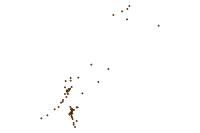

In [129]:
gis.updateLayerFromTable()

In [ ]:
# login and create new agol gis user class
gis = agol()

In [ ]:
# search for user items, returns list of items, max = 2nd parameter, optional itemType last parameter
search = gis.search('water sampling 2021', 20,'Feature Service')
search[0]

In [ ]:
# save item as separate binding in: 'item'
item = gis.getItem(search[0].id)

In [ ]:
# obtain table as AGOL tab;le item/class
table = item.getTable()

In [ ]:
# create dataFrame from related table
df = table.tableQuery()

In [ ]:
# df can now be used like any regular dataframe
df.describe

In [ ]:
  def updateLayerFromTable(self):
    keyWords = input(f'Item Search Query: ') or ''
    iType = input(f'AGOL Item Type: ') or ''
    search = self.search(keyWords, 10,iType)
    ind = int(input(f'Search Item Index: ')) or 0
    item = self.getItem(search[ind].id)

    for i, tab in enumerate(self.item.tables):
      display(f'{i} - {tab.properties.name}')
    time.sleep(1)
    # Quick fix to get proper id index for table instead of related layer
    ind = int(input('Select index of Table: '))  + 1
    url = self.item.url
    table = agolTable(url, ind)
    return table


In [ ]:
# setup for update function, get table and layer as FeatureSet
search = gis.search('water sampling 2021', 5,'Feature Service')
item = gis.getItem(search[0].id)
table = item.getTable()
layer = item.getLayer()
# returns table query as Feature Set
# featSet.sdf can generate spatial dataFrame and more from Feature Set!
tableFeat = table.table.query()
layerFeat = layer.layer.query()

In [94]:
for lFeat in layerFeat:
  lFeat.set_value(layAtt, 0)
edits = layer.layer.edit_features(updates=layerFeat)

In [119]:
# Function to update attributes in a Feature Layer based on related table values
# Based on agol class custom libray
pKey,tabAtt,layAtt,ref = 'SITE_ID','DO_mgl','DO_STATUS_',[5,6,7,100] # values to be passed into function

# First set all target layer attribute 'layAtt' to zero to clear old values
for lFeat in layerFeat:
  lFeat.set_value(layAtt, 0)
edits = layer.layer.edit_features(updates=layerFeat)

# Next loop through each entry in table to update attribute in layer
for tFeat in tableFeat:
  # test for null features
  if (tFeat.attributes['WATER_TEMP']):
    # loop through all layer features to find match with pKey
    for lFeat in layerFeat:
      if tFeat.attributes[pKey] == lFeat.attributes[pKey]:
        print(f'{tFeat.attributes[pKey]} matches {lFeat.attributes[pKey]} value {tFeat.attributes[tabAtt]}')
        for x,val in enumerate(ref, start=1):
          if tFeat.attributes[tabAtt] < val:
            print(f'found value {x}')
            lFeat.set_value(layAtt, x)
            break
# Now update target layer with updated FeatureSet using edit_features()            
edits = layer.layer.edit_features(updates=layerFeat)
# Count edited features, currently counting all features
for i, edit in enumerate(edits['updateResults'],start=1):
  pass
print(f'updated {layer.layer.properties.name} with {i} edits')


SCD-ST-40 matches SCD-ST-40 value 7.66
found value 4
SCD-ST-40 matches SCD-ST-40 value 7.65
found value 4
PNC-ST-60 matches PNC-ST-60 value 7.34
found value 4
PNC-ST-50 matches PNC-ST-50 value 6.9
found value 3
PNC-ST-45 matches PNC-ST-45 value 7.7
found value 4
updated WATER_STATIONS_2021 with 63 edits


In [ ]:
# X Loop through each Feature in Feature Set
# X Check for null samples
# X Find SITE ID to match records with
# X Get value of SITE ID for Table Record
# X Loop through list of Features/Stations in Associated Feature Service
# X Get value of each Feature Service Feature
# X Check for match
# X if match is found, then loop through list of break values to find where Table Record Value fits 
# X Use layerFeature.set_value() to set status for feature, categorize from [1, 2, 3, 4]
# X Set updates to Target Layer with updated FeatureSet with targetLayer.edit_features(updates=layerFeatures)
# X Show number of edits completed, just for reference, does not effect values.